# Things to consider when developing an app

This is an experiment to benchmark 3 algos

The problem is about graphs. The goal is to found that every node is connected to at least two edges. Every edge has a cost. The goal is to minimize the cost of the edges.

## What did I need for this app?

### 1. Benchmark system

Params needed:

- **Algoritihms**: list of algorithms to test
- **Input sizes**: list of **n** number of nodes to test 
- **Repetitions**: number of repetitions to test
- **Output**: benchmark results
  - **cost** = cost of the edges
  - **time** = time to run the algorithm
  - **space** = space to run the algorithm
 
Outcomes needed:
- Cost
  - function to calculate the value ´evaluate_solution´
- Temporal Complexity
  - Package: ´´timeit´´
- Space Complexity
  - Package: ´´tracemalloc´´ or ´´memory_profiler´´


### 2. Algorithms

**Preconditions**

Prepare a function to generate a graph.
- Params:
  - **n**: number of nodes
  - **min_weight**: minimum weight of the edges
  - **max_weight**: maximum weight of the edges

With ´networkx´ library, we can generate full connected graphs to then apply the algorithms.

**Implement the following algorithms**

- Brute force
- Heuristic based in Kruskal algorithm
- Metaheuristic based in simulated annealing

**How to manage a graph to do algorithm operations?**

Use ´´networkx´´ library for this. This way I have the data structure to manage the graph and the algorithms to work with it.

Moreover, this library have **minimum spanning tree algorithm**, which is useful for the heuristic algorithm and the simulated annealing algorithm. This algorithm used Kruskal algorithm to find the minimum spanning tree.


### 3. Results Analysis

We need to compare the results of the algorithms.

We can use plots, dicts or df to show the results.

Libraries:
- ´´matplotlib´´
- ´´pandas´´
- ´´numpy´´
- ´´seaborn´´

The results to compare for each number of node input are:

- Solution cost 
- Solution reliability???
- Time Complexity
- Space Complexity

Because each algorithm run with 3 different input sized and each of that runs are repeated, we can calculate:

- Average
- Min
- Max


Of the results.




# Prototyping


In [171]:
# libraries used
import networkx as nx
import numpy as np
import timeit
import tracemalloc
import matplotlib.pyplot as plt
#scipy needed for nerworkx

## networkx example

In [172]:

def generate_random_graph(num_nodes, num_edges):
    return nx.gnm_random_graph(num_nodes, num_edges)

# Example usage:
test_graph = generate_random_graph(4, 2)

# print the graph
print(test_graph.edges())


[(0, 2), (1, 2)]


## Random graph generation with networkx

In [173]:

# Specific problem graph generator
def generate_random_graph(num_nodes: int, min_cost: int, max_cost: int):
    """
    Undirected graph generator, where the graph is fully connected
    and the weight of the edges are random cost and a reliability value.
    Parameters:
    ----------
    num_nodes: int
        Number of nodes in the graph
    min_cost: int
        Minimum value of the cost of the edges
    max_cost: int
        Maximum value of the cost of the edges
    """
    # num_edges to have a full connected graph
    num_edges = num_nodes * (num_nodes - 1) // 2
    # values of weights are random integers between 1 and 100
    graph = nx.gnm_random_graph(num_nodes, num_edges)
    for u, v in graph.edges:
        # cost and reliability of each edge connection beetween nodes
        graph[u][v]['values'] = {
            "cost": np.random.randint(min_cost, max_cost),
            "reliability": np.random.uniform(0, 1),
        }
    return graph

In [174]:
# testing the function
base_graph = generate_random_graph(num_nodes=5, min_cost=1, max_cost=20)

# print matrix with value tuples
print("Graph Nodes:")
print(base_graph.nodes)


print("\nGraph Edges with Attributes:")
for u, v, attr in base_graph.edges(data=True):
    print(f"({u}, {v}) -> cost: {attr['values']['cost']}, reliability: {attr['values']['reliability']:.2f}")

Graph Nodes:
[0, 1, 2, 3, 4]

Graph Edges with Attributes:
(0, 1) -> cost: 11, reliability: 0.37
(0, 2) -> cost: 18, reliability: 0.64
(0, 3) -> cost: 3, reliability: 0.43
(0, 4) -> cost: 18, reliability: 0.30
(1, 2) -> cost: 9, reliability: 0.01
(1, 3) -> cost: 12, reliability: 0.80
(1, 4) -> cost: 11, reliability: 0.49
(2, 3) -> cost: 10, reliability: 0.31
(2, 4) -> cost: 9, reliability: 0.90
(3, 4) -> cost: 13, reliability: 0.68


In [175]:
def evaluate_solution(graph, edges):
    # dummy solution with the cost of all edges
    return sum(graph[u][v]['values']['cost'] for u, v in edges)

## Benchmark system

### Sample size calculation
To compute the ideal sample por each algorithm with a given input size, we need to calculate the number of repetitions to get a good sample.

#### Option size 1 - 90% confidence and 10% error
With 90% confidence and 10% error, we can calculate the sample size with the following formula:
- z = 1.645: z-score for 90% confidence
- e = 0.1  : error
- p = 0.5  : population proportion
- n        : sample size

n = (z^2 * p * (1-p)) / e^2

n = 67,6

#### Option size 2 - 80% confidence and 20% error
With 80% confidence and 20% error, we can calculate the sample size with the following formula:
- z = 1.282: z-score for 80% confidence
- e = 0.2  : error
- p = 0.5  : population proportion
- n        : sample size

n = (z^2 * p * (1-p)) / e^2

n = 10,3


In [176]:
def evaluate_solution(graph, edges):
    # dummy solution with the cost of all edges
    return sum(graph[u][v]['values']['cost'] for u, v in edges)

In [177]:
# Dummy algorithms
import time

def brute_force(graph):
    # Dummy implementation
    list_edges = list(graph.edges(data=True))
    return {"total_cost": 2, "reliability": 0.3}

def kruskal_heuristic(graph):
    # Dummy implementation
    list_edges = list(graph.edges(data=True))
    return {"total_cost": 2, "reliability": 0.3}

def simulated_annealing(graph: nx.Graph, max_iter=100, minimal_temp=20.1, cooling_rate=0.99):
    # Dummy implementation
    list_edges = list(graph.edges(data=True))
    return {"total_cost": 2, "reliability": 0.3}

**Other considerations**

In the next function, we are going to do the benchmark for each algorithm with the sample size calculated.

Output:
- time_response_variable    : it will be a resulto with the average, min and max time for each algorithm
- space_results   : it will be a resulto with the average, min and max space for each algorithm
- utility_response_variable : it will be the solution of the algorithm.

Having mean, min and max values, we can compare the versatility of the algorithms.

In [178]:
# Benchmark wrapper function
def benchmark_algorithm(algorithm, graph: nx.graph, number_of_runs=67):
    """
    Compute the benchmark results for a given algorithm with a graph
    and a specified number of runs.

    Parameters
    ----------
    algorithm : function
        The algorithm to benchmark.
    graph : nx.Graph
        The graph on which the algorithm will be run.
    number_of_runs : int, optional
        Number of runs to perform for each benchmark. Default is 67.

    Returns
    -------
    time_response_variable : dict
        Dict with mean, min and max of execution times.
    memory_response_variable : dict
        Dict with mean, min and max of peak memory usages
    utility_response_variable : list of Solutions
        List of utility values total cost and fiability for each run.
    """

    # Variables to store the output
    ## The term "response variable" is used in Experimental Design to refer to the output of the experiment
    time_response_variable = {"mean": 0, "min": 0, "max": 0}
    memory_response_variable = {"mean": 0, "min": 0, "max": 0}
    # set of utility values
    utility_response_variable = []

    # Variables to store the benchmark results
    time_bench_results = []
    memory_bech_results = []

    for _ in range(number_of_runs):
        # Track time using timeit
        timer = timeit.Timer(lambda: algorithm(graph))
        exec_time = timer.timeit(number=1)

        # Track memory using tracemalloc
        tracemalloc.start()
        result = algorithm(graph)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        # Collect results
        time_bench_results.append(exec_time)
        memory_bech_results.append(peak / 10**6)  # Convert to MB
        utility_response_variable.append(result['total_cost'])

    # Compute the mean, min and max of the results
    time_response_variable["mean"] = np.mean(time_bench_results)
    time_response_variable["min"] = np.min(time_bench_results)
    time_response_variable["max"] = np.max(time_bench_results)

    memory_response_variable["mean"] = np.mean(memory_bech_results)
    memory_response_variable["min"] = np.min(memory_bech_results)
    memory_response_variable["max"] = np.max(memory_bech_results)

    # Clean the repited utility values
    utility_response_variable = list(set(utility_response_variable))

    return time_response_variable, memory_response_variable, utility_response_variable




**Run the bench after setup**

We need to run the benchmark after the setup of the algorithms. This way we can compare the results of the algorithms.

**Objective**:

- Display the results of the benchmark setup.
  - As a table or plots

To accomplish this, we need to have a data object to save the results of 
benchmark_algorithm function. And we need to save that with each number of nodes.

For this we can use a **dataframe**:
- Columns:
  - algorithm_name
  - input_size
  - time_mean
  - time_min
  - time_max
  - space_mean
  - space_min
  - space_max
  - total_cost

Then, we can use this dataframe to plot the results or show tables.

Output:
- None, only display the results 

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
def bar_plot_results(df: pd.DataFrame, column: str):
    """
    Plot the time results of the benchmark
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with the results of the benchmark
    title : str
        Title of the plot
    """
    ## prepere the data
    algorithms = df["algorithm_name"].unique()
    input_sizes = df["input_size"].unique()
    x = np.arange(len(input_sizes))  # x-axis positions for groups
    width = 0.2  # width of the bars

    ## create grouped data
    figure, axes = plt.subplots(figsize=(10, 6))
    for i, algorithm in enumerate(algorithms):
        algorithm_data = df[df["algorithm_name"] == algorithm]
        axes.bar(x + i * width, algorithm_data[column], width, label=algorithm)

    ## Customize plot
    axes.set_xlabel("Input Size", fontsize=12)
    axes.set_ylabel(column, fontsize=12)
    axes.set_title("Grouped Bar Chart: Algorithm Comparison", fontsize=14)
    axes.set_xticks(x + width)
    axes.set_xticklabels(input_sizes)
    axes.legend(title="Algorithms")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

In [181]:
def line_plot_results(df: pd.DataFrame, column: str):
    """
    Plot the time results of the benchmark
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with the results of the benchmark
    title : str
        Title of the plot
    """
    # Prepare the plot
    plt.figure(figsize=(10, 6))

    ## prepere the data

    algorithms = df["algorithm_name"].unique()
    input_sizes = df["input_size"].unique()
    width = 0.2  # width of the bars

    # Iterate through each algorithm and plot its line
    for algorithm in algorithms:
        algorithm_data = df[df["algorithm_name"] == algorithm]
        plt.plot(
            algorithm_data["input_size"],
            algorithm_data[column],
            marker='o',
            label=algorithm
        )

    ## Customize plot
    plt.xlabel("Input Size", fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title("Line Chart: Algorithm Comparison", fontsize=14)
    plt.legend(title="Algorithms", fontsize=10)
    plt.grid(axis="both", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


In [182]:


columns = ["algorithm_name", "input_size", "time_mean", "time_min","time_max",
           "memory_mean", "memory_min", "memory_max", "total_cost"]

# Main function to run the benchmark
def run_benchmarks():

    # Algorithms to test.
    algorithms = {
        "Brute Force": brute_force,
        "Kruskal Heuristic": kruskal_heuristic,
        "Simulated Annealing": simulated_annealing,
    }

    # Input control variables
    number_of_nodes = [20, 40, 60]
    min_cost = 1
    max_cost = 20

    # Dataframe to store the results
    results_df = pd.DataFrame(columns=columns)

    #for the same input size we use the same graph to test the algorithms
    for size in number_of_nodes:
        graph = generate_random_graph(size, min_cost, max_cost)

        # Results for each algorithm
        results = {}

        for name, algorithm in algorithms.items():
            time_response_variable, memory_response_variable, utility_response_variable = benchmark_algorithm(
                    algorithm, graph, number_of_runs=10)

            results = {
                "algorithm_name": name,
                "input_size": size,
                "time_mean": time_response_variable["mean"],
                "time_min": time_response_variable["min"],
                "time_max": time_response_variable["max"],
                "memory_mean": memory_response_variable["mean"],
                "memory_min": memory_response_variable["min"],
                "memory_max": memory_response_variable["max"],
                "total_cost": utility_response_variable,
            }

            # Convert results to a DataFrame and append to the main DataFrame
            new_row = pd.DataFrame([results])
            results_df = pd.concat([results_df, new_row], ignore_index=True)


    # Show the results in a table
    print(results_df)

    # Plot the results mathplotlib
    # Time mean, max and min separately
    bar_plot_results(results_df, "time_mean")
    bar_plot_results(results_df, "time_min")
    bar_plot_results(results_df, "time_max")
    line_plot_results(results_df, "time_mean")
    line_plot_results(results_df, "time_min")
    line_plot_results(results_df, "time_max")




        algorithm_name input_size  time_mean  time_min  time_max  memory_mean  \
0          Brute Force         20   0.000101  0.000065  0.000147     0.003120   
1    Kruskal Heuristic         20   0.000090  0.000063  0.000243     0.003120   
2  Simulated Annealing         20   0.000072  0.000063  0.000109     0.003120   
3          Brute Force         40   0.000267  0.000231  0.000401     0.008656   
4    Kruskal Heuristic         40   0.000249  0.000232  0.000380     0.008656   
5  Simulated Annealing         40   0.000431  0.000401  0.000464     0.008656   
6          Brute Force         60   0.001172  0.000515  0.003173     0.018208   
7    Kruskal Heuristic         60   0.000927  0.000724  0.001154     0.018208   
8  Simulated Annealing         60   0.000672  0.000497  0.000994     0.018208   

   memory_min  memory_max total_cost  
0    0.003120    0.003120        [2]  
1    0.003120    0.003120        [2]  
2    0.003120    0.003120        [2]  
3    0.008656    0.008656        

C:\Users\JirlOP\AppData\Local\Temp\ipykernel_12752\1443543090.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


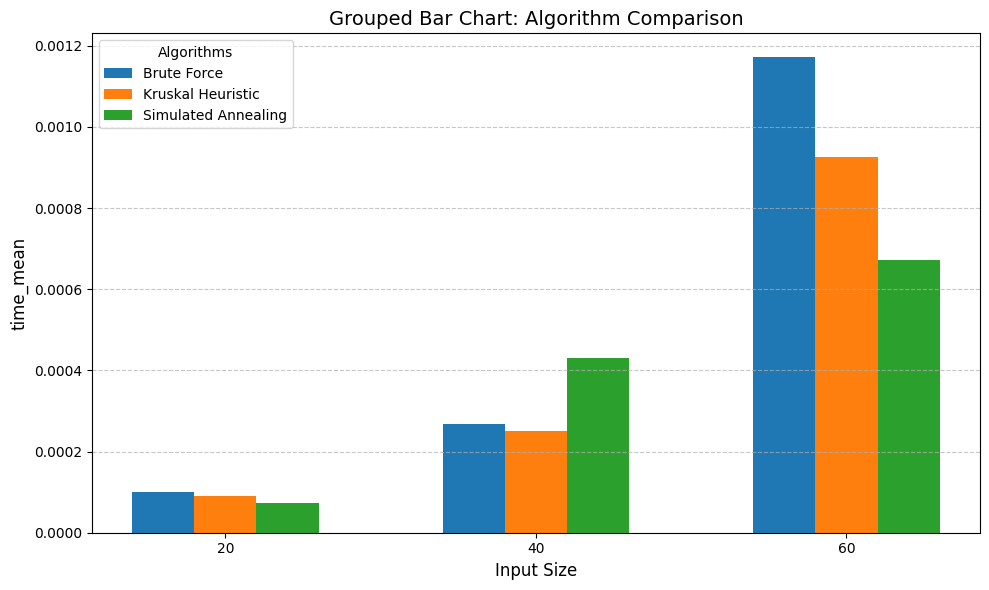

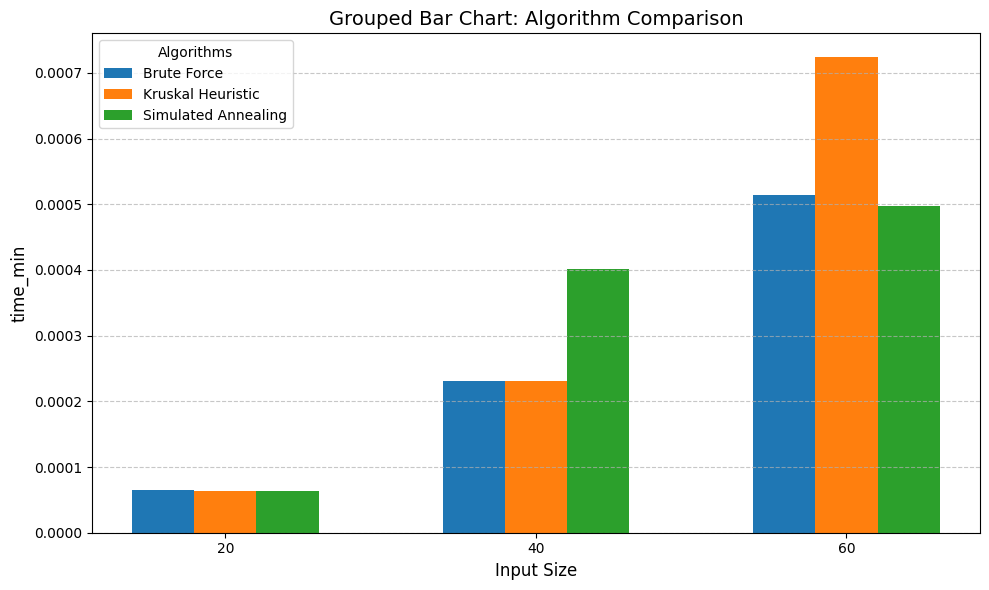

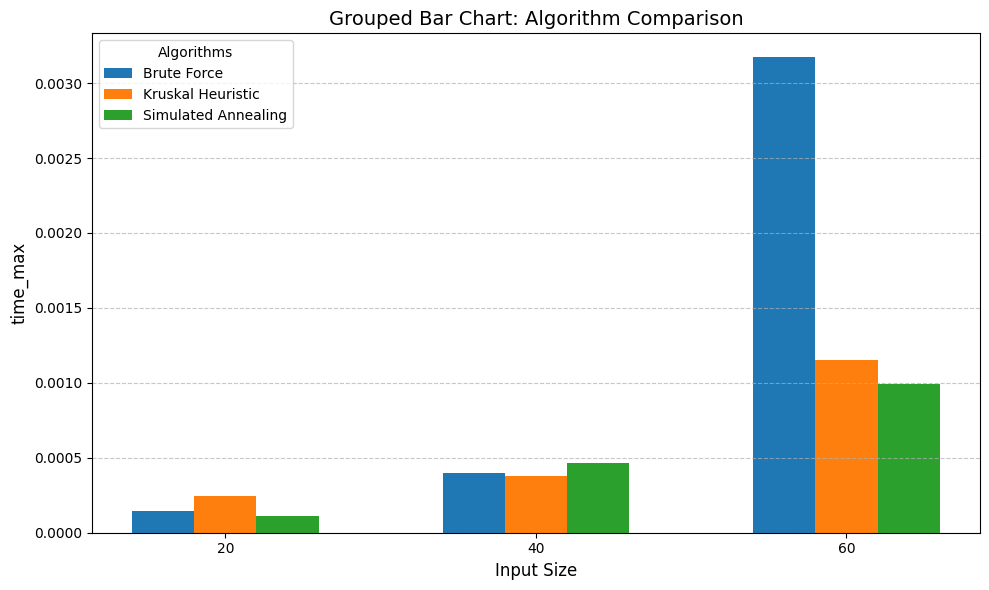

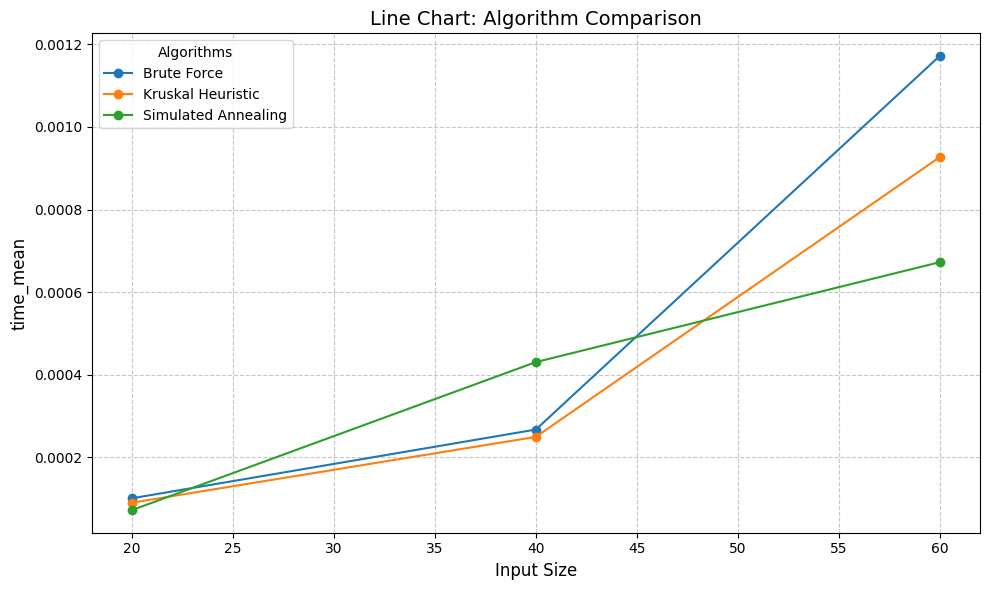

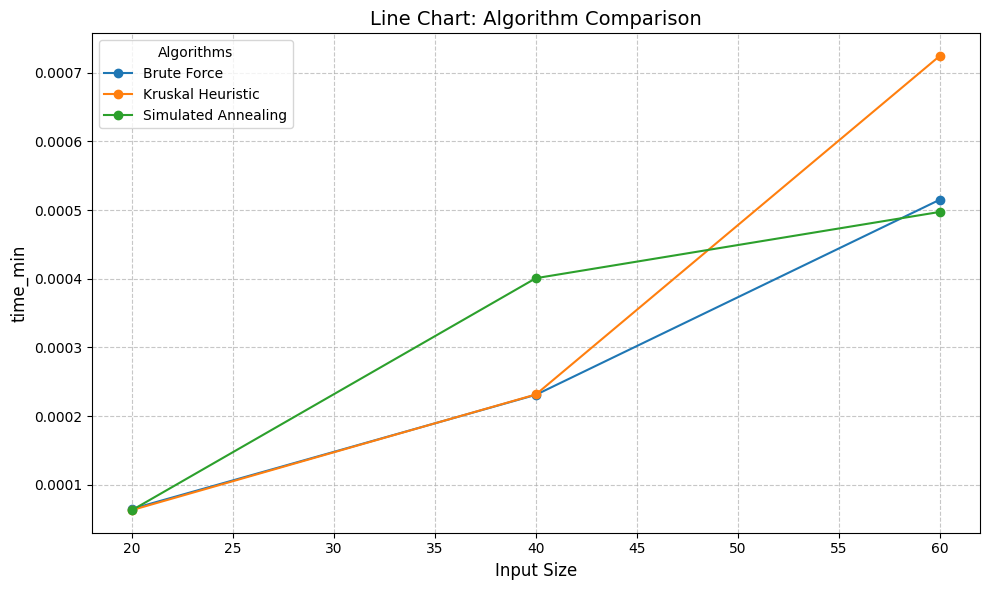

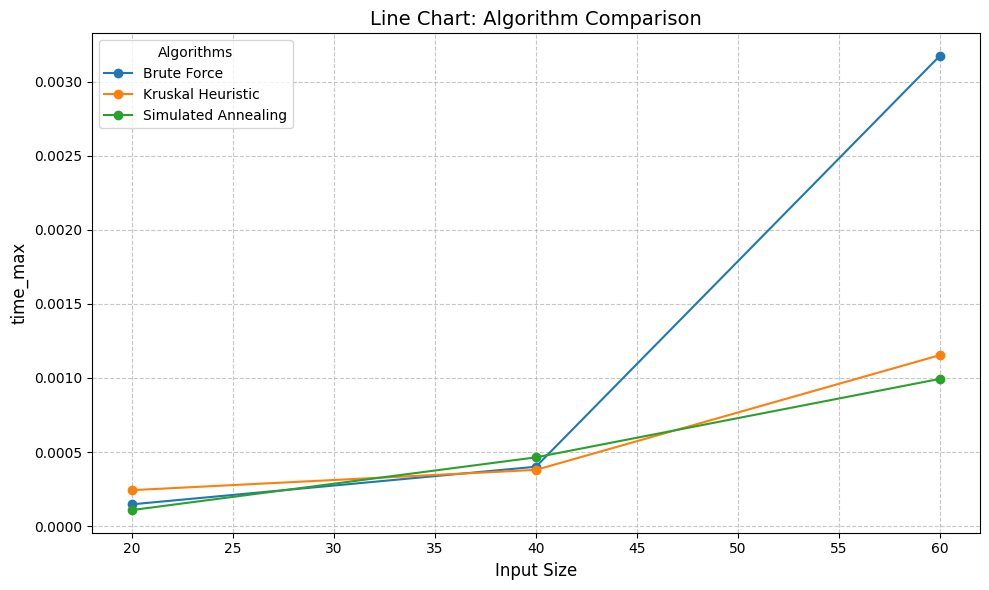

In [183]:

# Run the benchmark
run_benchmarks()

### plot ideas

#### Bar plot
```python
# Plotting the results
for metric in ["time", "memory", "utility"]:
    plt.figure()
    width = 0.25  # Width of each bar
    x = np.arange(len(number_of_nodes))  # X positions for groups

    for i, name in enumerate(algorithms.keys()):
        plt.bar(
            x + i * width,  # Offset the bars for each algorithm
            results[name][metric],  # Metric data for the current algorithm
            width=width,
            label=name,
        )

    plt.xlabel("Input size (number of nodes)")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Comparison")
    plt.xticks(x + width * (len(algorithms) - 1) / 2, number_of_nodes)
    plt.legend()
    plt.show()
```

#### Line plot
```python
    for name in algorithms.keys():
        plt.plot(number_of_nodes, results[name][metric], label=name)
    plt.xlabel("Input size (number of nodes)")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Comparison")
    plt.legend()
    plt.show()
```
